<h1>Preguntas Guı́a <h1>

<h2>1. Acerca de pokebolas:<h2>
<h3>a) Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola? <h3>

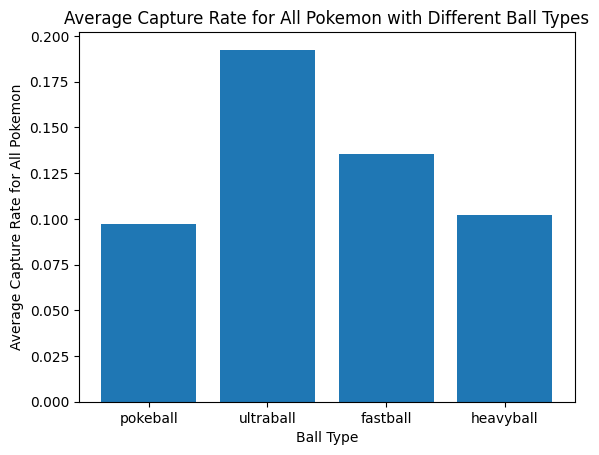

In [16]:
import matplotlib.pyplot as plt
from pokemon import PokemonFactory, StatusEffect
import matplotlib.pyplot as plt
from pokemon import PokemonFactory, StatusEffect
from catching import attempt_catch

factory = PokemonFactory("pokemon.json")
num_attempts = 100
noise_level = 0.15

pokemonName_list = ["snorlax", "jolteon", "caterpie", "onix", "mewtwo"]
ball_types = ['pokeball', 'ultraball', 'fastball' , 'heavyball']

# Create a nested dictionary to store average capture rates for all pokemon and all ball types
average_capture_rates_dict = {pokemon: {ball_type: [] for ball_type in ball_types} for pokemon in pokemonName_list}

# Loop for each pokemon
for pokemon_name in pokemonName_list:
    pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, 1)
    for ball_type in ball_types:
        total_capture_rate = 0
        for _ in range(num_attempts):
            attempt_result, capture_rate = attempt_catch(pokemon, ball_type, noise_level)
            total_capture_rate += capture_rate
        average_capture_rate = total_capture_rate / num_attempts
        # Append the average capture rate to the appropriate list in the nested dictionary
        average_capture_rates_dict[pokemon_name][ball_type].append(average_capture_rate)

# Calculate the average capture rate for each pokemon and each ball type
average_capture_rates = {pokemon: {ball_type: sum(capture_rates) / len(capture_rates) for ball_type, capture_rates in rates.items()} for pokemon, rates in average_capture_rates_dict.items()}
# Calculate the average capture rate for all pokemons for each ball type
average_capture_rates_all_pokemon = {ball_type: sum([rates[ball_type] for pokemon, rates in average_capture_rates.items()])/len(pokemonName_list) for ball_type in ball_types}

plt.figure()
plt.bar(average_capture_rates_all_pokemon.keys(), average_capture_rates_all_pokemon.values())
plt.xlabel('Ball Type')
plt.ylabel('Average Capture Rate for All Pokemon')
plt.title('Average Capture Rate for All Pokemon with Different Ball Types')
plt.show()


<h3> b) ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrı́nsecas de cada Pokemon? <h3>

Como se puede ver en los graficos abajo hay pokebolas que son mas efectivas con unos pokemons. Por ejemplo Mewto solo se puede atrapar con una fastball, mientras es mas efectivo atrapar Snorlax o Caterpie con ultraballs.



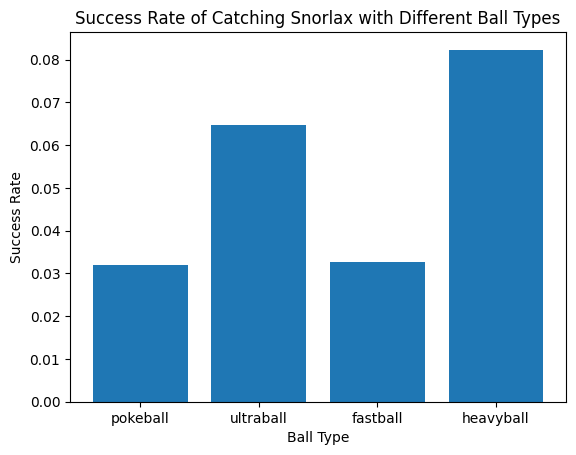

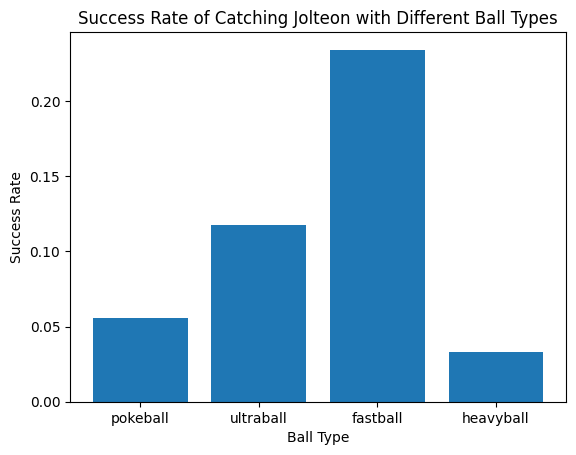

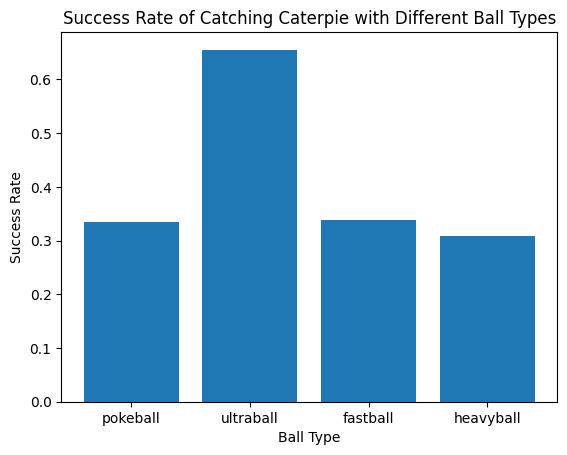

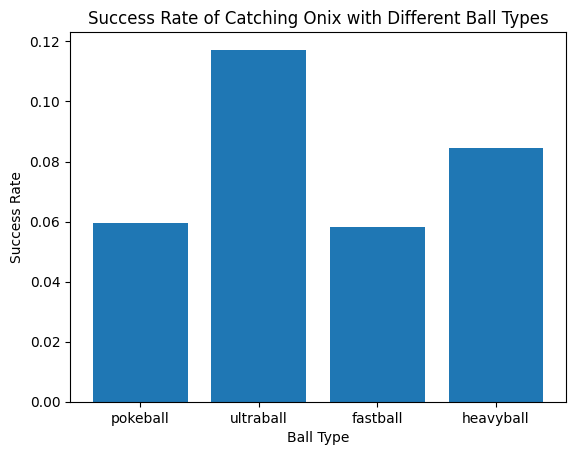

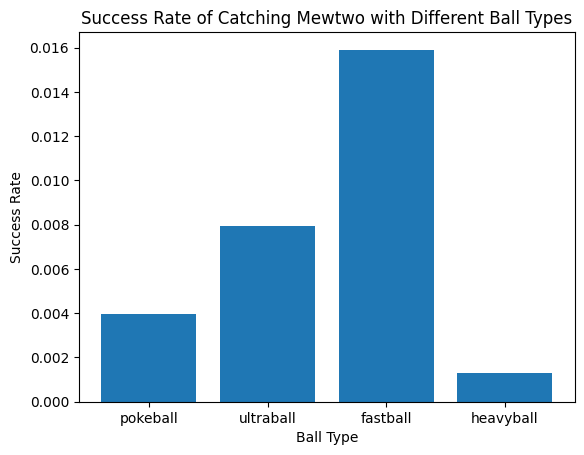

In [17]:
for pokemon, rates in average_capture_rates.items():
    plt.figure()
    plt.bar(rates.keys(), rates.values())
    plt.xlabel('Ball Type')
    plt.ylabel('Success Rate')
    plt.title(f'Success Rate of Catching {pokemon.capitalize()} with Different Ball Types')
    plt.show()

<h2>2. Acerca del estado del Pokemon:<h2>
<h3>a) ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es ası́, ¿Cuál es más o menos efectiva?<h3>

In [ ]:
# Create a dictionary to store average capture rates for all pokemon and all HP levels
average_capture_rates_dict = {pokemon: {hp: 0 for hp in range(10, 101, 10)} for pokemon in pokemonName_list}

# Loop for each pokemon
for pokemon_name in pokemonName_list:
    for hp in range(10, 101, 10):
        pokemon = factory.create(pokemon_name,100, StatusEffect.NONE, hp / 100)
        total_capture_rate = 0
        for ball_type in ball_types:
            for _ in range(num_attempts):
                attempt_result, capture_rate = attempt_catch(pokemon, ball_type, noise_level)
                total_capture_rate += capture_rate
        average_capture_rate = total_capture_rate / (num_attempts * len(ball_types))
        # Store the average capture rate in the dictionary
        average_capture_rates_dict[pokemon_name][hp] = average_capture_rate

# Plot the results for Snorlax
plt.figure()
plt.plot([hp for hp in range(10, 101, 10)], [average_capture_rates_dict['snorlax'][hp] for hp in range(10, 101, 10)], label='Snorlax')
plt.xlabel('HPin %')
plt.ylabel('Average Capture Rate for All Pokeballs')
plt.title('Average Capture Rate for Snorlax with All Pokeballs')
plt.legend()
plt.show()

# Plot the results for Jolteon
plt.figure()
plt.plot([hp for hp in range(10, 101, 10)], [average_capture_rates_dict['jolteon'][hp] for hp in range(10, 101, 10)], label='Jolteon')
plt.xlabel('HP in %')
plt.ylabel('Average Capture Rate for All Pokeballs')
plt.title('Average Capture Rate for Jolteon with All Pokeballs')
plt.legend()
plt.show()

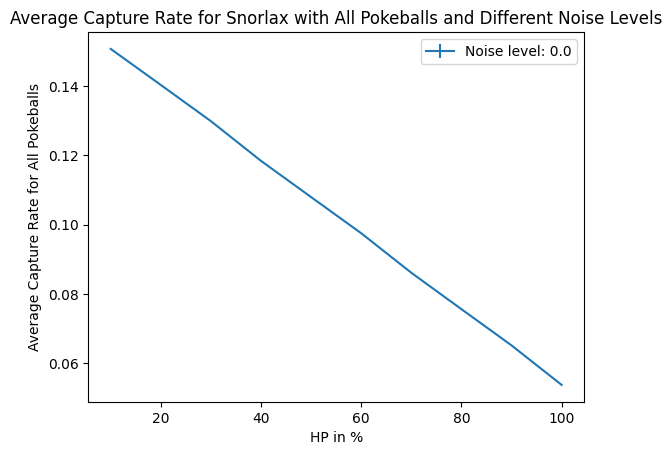

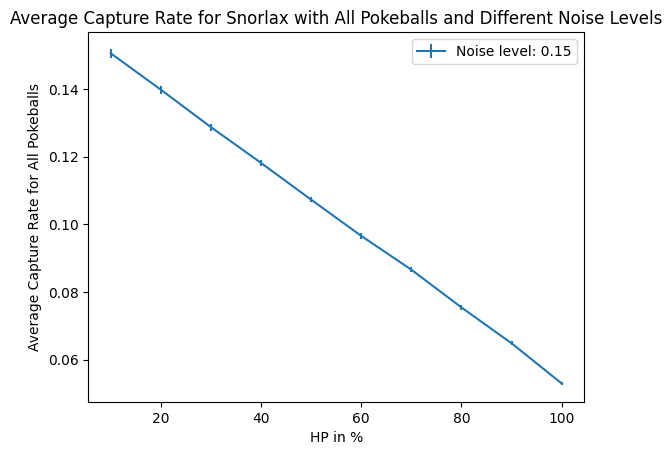

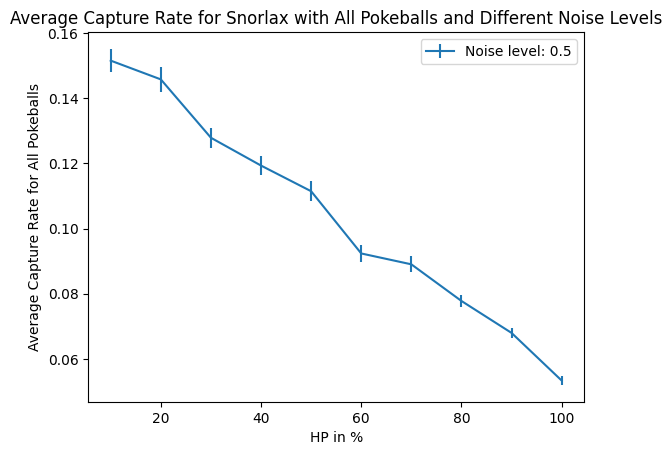

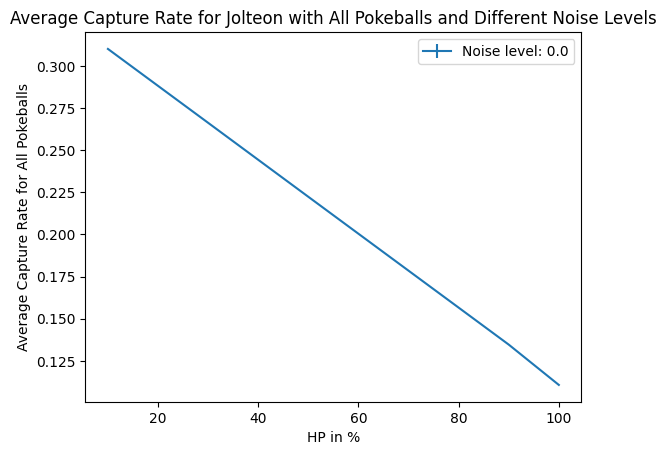

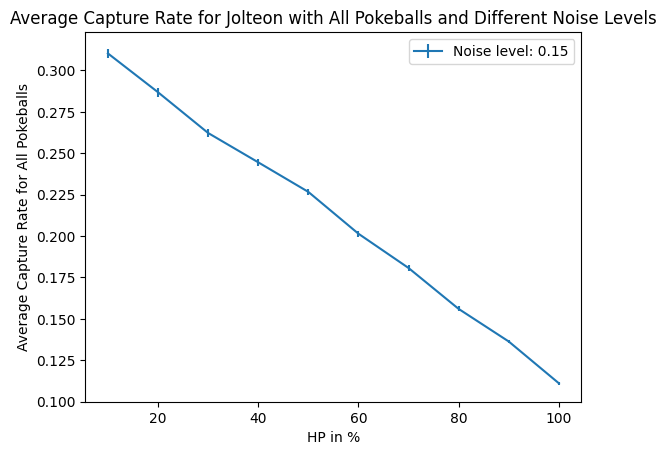

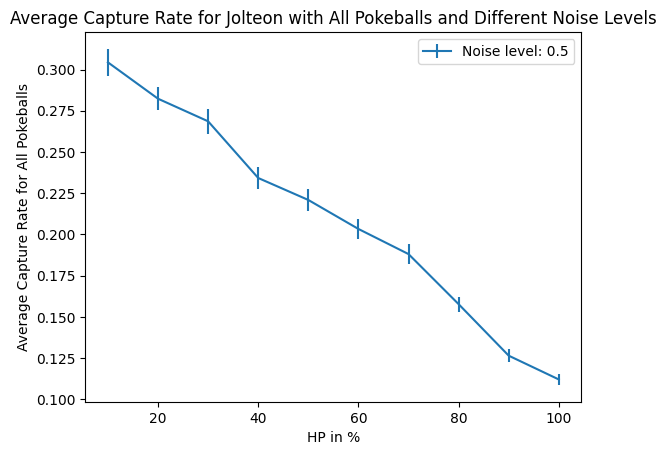

In [33]:
import numpy as np


pokemonName_list = ["snorlax", "jolteon"]
ball_types = ['pokeball', 'ultraball', 'fastball' , 'heavyball']
noise_levels = [0.0,0.15,0.5]

# Create a dictionary to store average capture rates for all pokemon, HP levels, and noise levels
average_capture_rates_dict = {pokemon: {hp: {noise: [] for noise in noise_levels} for hp in range(10, 101, 10)} for pokemon in pokemonName_list}

# Loop for each pokemon
for pokemon_name in pokemonName_list:
    for hp in range(10, 101, 10):
        pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, hp / 100)
        for noise_level in noise_levels:
            capture_rates = []
            for _ in range(num_attempts):
                total_capture_rate = 0
                for ball_type in ball_types:
                    attempt_result, capture_rate = attempt_catch(pokemon, ball_type, noise_level)
                    total_capture_rate += capture_rate
                average_capture_rate = total_capture_rate / len(ball_types)
                capture_rates.append(average_capture_rate)
            # Store the list of capture rates in the dictionary
            average_capture_rates_dict[pokemon_name][hp][noise_level] = capture_rates

# Calculate the mean and standard error of the average capture rates for each pokemon, HP level, and noise level
mean_capture_rates_dict = {pokemon: {hp: {noise: np.mean(rates) for noise, rates in noise_rates.items()} for hp, noise_rates in hp_noise_rates.items()} for pokemon, hp_noise_rates in average_capture_rates_dict.items()}
std_error_dict = {pokemon: {hp: {noise: np.std(rates) / np.sqrt(len(rates)) for noise, rates in noise_rates.items()} for hp, noise_rates in hp_noise_rates.items()} for pokemon, hp_noise_rates in average_capture_rates_dict.items()}


# Plot the results for Snorlax
plt.figure()
for noise_level in noise_levels:
    plt.errorbar([hp for hp in range(10, 101, 10)], [mean_capture_rates_dict['snorlax'][hp][noise_level] for hp in range(10, 101, 10)], yerr=[std_error_dict['snorlax'][hp][noise_level] for hp in range(10, 101, 10)], label=f'Noise level: {noise_level}')
    plt.xlabel('HP in %')
    plt.ylabel('Average Capture Rate for All Pokeballs')
    plt.title('Average Capture Rate for Snorlax with All Pokeballs and Different Noise Levels')
    plt.legend()
    plt.show()

# Plot the results for Jolteon
plt.figure()
for noise_level in noise_levels:
    plt.errorbar([hp for hp in range(10, 101, 10)], [mean_capture_rates_dict['jolteon'][hp][noise_level] for hp in range(10, 101, 10)], yerr=[std_error_dict['jolteon'][hp][noise_level] for hp in range(10, 101, 10)], label=f'Noise level: {noise_level}')
    plt.xlabel('HP in %')
    plt.ylabel('Average Capture Rate for All Pokeballs')
    plt.title('Average Capture Rate for Jolteon with All Pokeballs and Different Noise Levels')
    plt.legend()
    plt.show()


Se puede observar en los gráficos que la variabilidad de la efectividad de captura para un mismo nivel de HP aumenta con diferentes niveles de ruido. Cuando el nivel de ruido es cero, no hay variabilidad y la función es perfectamente lineal, es decir, la efectividad de captura es directamente proporcional al porcentaje de puntos de vida. Sin embargo, a medida que aumenta el nivel de ruido, aparece una variabilidad más grande entre los puntos calculados. Esto se debe a que el nivel de ruido introduce más aleatoriedad en la función de captura de los Pokémon, lo que resulta en una mayor variabilidad en la efectividad de captura para un mismo nivel de HP.